In [127]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [128]:
import numpy as np
import pandas as pd

In [129]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [130]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [131]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [132]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base

sqlalchemy.ext.automap.Base

In [133]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [134]:
# Save references to each table
Measurement = Base.classes.measurement

station = Base.classes.station
station

sqlalchemy.ext.automap.station

In [135]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

In [136]:
#inspect Measurement
from sqlalchemy import inspect
inspector = inspect(engine)

for table_name in inspector.get_table_names():
   for column in inspector.get_columns('Measurement'):
       print("Column: %s" % column['name'], column["type"])
       
        
    

Column: id INTEGER
Column: station TEXT
Column: date TEXT
Column: prcp FLOAT
Column: tobs FLOAT
Column: id INTEGER
Column: station TEXT
Column: date TEXT
Column: prcp FLOAT
Column: tobs FLOAT


In [137]:
for table_name in inspector.get_table_names():
   for column in inspector.get_columns('station'):
       print("Column: %s" % column['name'], column["type"])

Column: id INTEGER
Column: station TEXT
Column: name TEXT
Column: latitude FLOAT
Column: longitude FLOAT
Column: elevation FLOAT
Column: id INTEGER
Column: station TEXT
Column: name TEXT
Column: latitude FLOAT
Column: longitude FLOAT
Column: elevation FLOAT


In [138]:
# Using engine.execute to display first 10 rows of Measurement table'

engine.execute('select * from Measurement').fetchmany(size=10)

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [139]:
# Using engine.execute to display first 10 rows of station table'

engine.execute('select * from station').fetchmany(size=10)

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# Exploratory Climate Analysis

In [140]:
#first date of the Measurement table
first_date = session.query(Measurement.date).order_by(Measurement.date).first()
first_date

('2010-01-01')

In [141]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first() 

last_date

('2017-08-23')

In [142]:
# Calculate the date 1 year ago from the last data point in the database

from datetime import datetime, timedelta
#date_one_yr_ago = latest_date - dt.timedelta(days=365)
date_one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
#date_one_year_ago = datetime.now(last_date, '%Y-%m-%d') - timedelta(days=365)
date_one_year_ago

datetime.date(2016, 8, 23)

In [143]:
# Perform a query to retrieve the data and precipitation scores

scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_one_year_ago).all()
scores

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [144]:
# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(scores, columns=['date', 'prcp'])
prcp_df.set_index('date', inplace=True)
prcp_df




,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [145]:
prcp_df.head(10)

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
2016-08-29,0.00
2016-08-30,0.00
2016-08-31,0.13


In [146]:
# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by = 'date')
prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


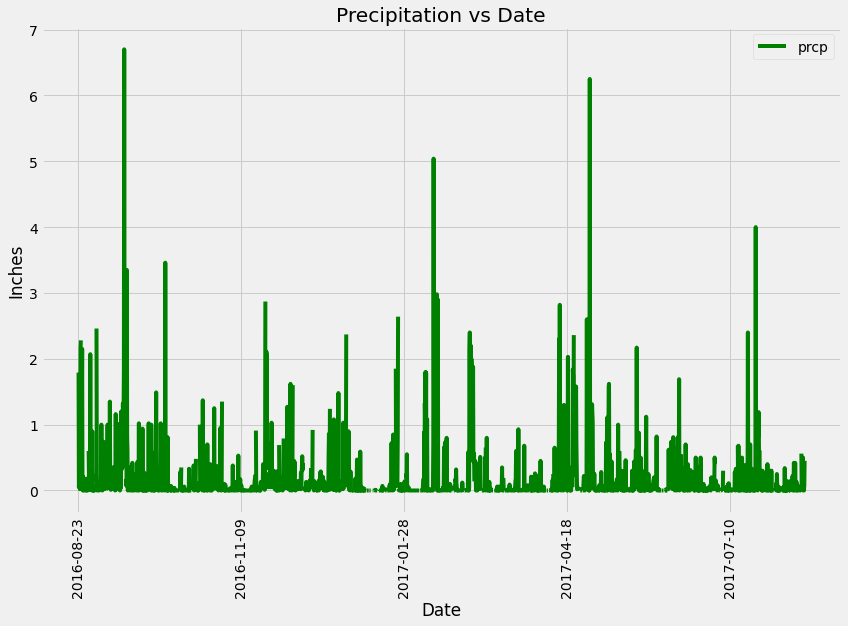

In [166]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(title="Precipitation vs Date", color = 'green', figsize = (12,8))
plt.ylabel("Inches")
plt.xlabel("Date")
plt.tight_layout()
plt.xticks(rotation="vertical")
plt.savefig("Images/fig1")
plt.show()

In [148]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary = prcp_df.describe()
summary

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [84]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(station).count()
station_count

9

In [85]:
# What are the most active stations? (i.e. what stations have the most rows)?


In [86]:
# List the stations and the counts in descending order.
station_count_desc = session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()
station_count_desc

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [87]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# most active station
most_active_station = station_count_desc[0][0]
most_active_station

'USC00519281'

In [88]:
# lowest temperature record for most active station
lowest_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
lowest_temperature


[(54.0)]

In [89]:
# highest temperature record for most active station
highest_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
highest_temperature

[(85.0)]

In [90]:
# Calculate averange temperature record for most active station
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
avg_temp

[(71.66378066378067)]

In [123]:
# Choose the station with the highest number of temperature observations.


highest_tob_station = session.query(Measurement.station, func.count(Measurement.tobs))\
                        .group_by(Measurement.station)\
                        .order_by(func.count(Measurement.tobs).desc()).first()[0]
#highest_tob_count = highest_tob_station
#highest_tob_count
#the most active temp station is USC00519281 with 2772 count
highest_tob_station

'USC00519281'

In [126]:
highest_tob_station_all = session.query(Measurement.station, func.count(Measurement.tobs)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.tobs).desc()).all()
highest_tob_station_all

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [92]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_ago_tob_data = session.query(Measurement.date, Measurement.station, Measurement.tobs)\
                        .filter(Measurement.station == 'USC00519281')\
                        .filter(Measurement.date >= date_one_year_ago).all()
one_year_ago_tob_data

[('2016-08-23', 'USC00519281', 77.0),
 ('2016-08-24', 'USC00519281', 77.0),
 ('2016-08-25', 'USC00519281', 80.0),
 ('2016-08-26', 'USC00519281', 80.0),
 ('2016-08-27', 'USC00519281', 75.0),
 ('2016-08-28', 'USC00519281', 73.0),
 ('2016-08-29', 'USC00519281', 78.0),
 ('2016-08-30', 'USC00519281', 77.0),
 ('2016-08-31', 'USC00519281', 78.0),
 ('2016-09-01', 'USC00519281', 80.0),
 ('2016-09-02', 'USC00519281', 80.0),
 ('2016-09-03', 'USC00519281', 78.0),
 ('2016-09-04', 'USC00519281', 78.0),
 ('2016-09-05', 'USC00519281', 78.0),
 ('2016-09-06', 'USC00519281', 73.0),
 ('2016-09-07', 'USC00519281', 74.0),
 ('2016-09-08', 'USC00519281', 80.0),
 ('2016-09-09', 'USC00519281', 79.0),
 ('2016-09-10', 'USC00519281', 77.0),
 ('2016-09-11', 'USC00519281', 80.0),
 ('2016-09-12', 'USC00519281', 76.0),
 ('2016-09-13', 'USC00519281', 79.0),
 ('2016-09-14', 'USC00519281', 75.0),
 ('2016-09-15', 'USC00519281', 79.0),
 ('2016-09-16', 'USC00519281', 78.0),
 ('2016-09-17', 'USC00519281', 79.0),
 ('2016-09-1

In [93]:
#create a dataframe
one_year_ago_tob_data_df = pd.DataFrame(one_year_ago_tob_data, columns=['date', 'tobs', 'prcp'])
one_year_ago_tob_data_df.set_index('date', inplace=True)
one_year_ago_tob_data_df


,tobs,prcp
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0
...,...,...
2017-08-14,USC00519281,77.0
2017-08-15,USC00519281,77.0
2017-08-16,USC00519281,76.0


In [94]:
one_year_ago_tob_data_df.head()

,tobs,prcp
date,,
2016-08-23,USC00519281,77.0
2016-08-24,USC00519281,77.0
2016-08-25,USC00519281,80.0
2016-08-26,USC00519281,80.0
2016-08-27,USC00519281,75.0


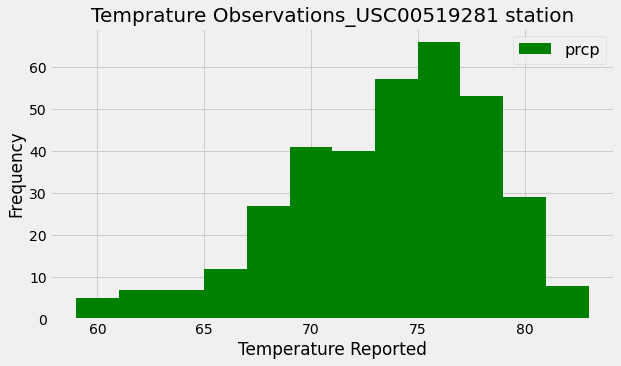

In [151]:
# Plot the one_year_ago_tob_data_df as a histogram
one_year_ago_tob_data_df_histrogram = one_year_ago_tob_data_df.plot(kind='hist', bins=12, figsize=(9,5), color = 'green')
plt.xlabel('Temperature Reported')
plt.title('Temprature Observations_USC00519281 station', fontsize=20)
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("Images/fig2")
plt.show()

## Bonus Challenge Assignment

In [96]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [97]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = '2015-03-26'
end_date = '2015-04-08'
temperature_result = calc_temps(start_date, end_date)
temperature_result

[(63.0, 72.9080459770115, 80.0)]

In [98]:
# Create a DataFrame for chosen dates data
temperature_result_df = pd.DataFrame(temperature_result, columns = ['Min', 'Avg', 'Max'])
temperature_result_df

,Min,Avg,Max
0,63.0,72.908046,80.0


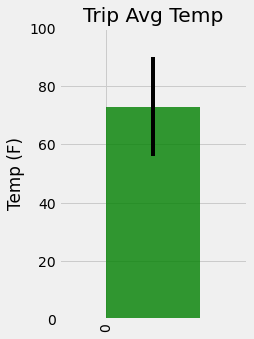

In [167]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr_data = [temperature_result_df['Max'] - temperature_result_df['Min']]
temperature_result_df.plot(kind='bar', y='Avg', yerr=yerr_data, color="green",
                      alpha=0.8, figsize=(3,5), align='edge', legend='', title='Trip Avg Temp')
plt.ylabel("Temp (F)")
plt.ylim(0,100)
plt.savefig("Images/fig3")
plt.show()

In [100]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

station_rainfall_data = (session.query(station.station, station.name, station.latitude, \
                                      station.longitude, station.elevation, \
                                      func.sum(Measurement.prcp),)\
                         .filter(Measurement.station == station.station,
                                 Measurement.date.between('2015-03-26', '2015-04-08'),)
                         .group_by(station.station)\
                         .order_by(func.sum(Measurement.prcp).desc()).all())
station_rainfall_data

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  6.37),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  2.61),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  2.38),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.56),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.72),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.7100000000000001),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.03),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  0.0)]

In [101]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [102]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Setting the start and end date of the trip

trip_start_date = '2015-03-26'
trip_end_date = '2015-04-08'

In [153]:
# Using the start and end date to create a range of dates

trip_date_range = pd.date_range(trip_start_date, trip_end_date)
trip_date_range

DatetimeIndex(['2015-03-26', '2015-03-27', '2015-03-28', '2015-03-29',
               '2015-03-30', '2015-03-31', '2015-04-01', '2015-04-02',
               '2015-04-03', '2015-04-04', '2015-04-05', '2015-04-06',
               '2015-04-07', '2015-04-08'],
              dtype='datetime64[ns]', freq='D')

In [155]:
# Stip off the year and save a list of %m-%d strings

date_range_new = pd.date_range(trip_start_date, trip_end_date).strftime('%m-%d')
date_range_new

Index(['03-26', '03-27', '03-28', '03-29', '03-30', '03-31', '04-01', '04-02',
       '04-03', '04-04', '04-05', '04-06', '04-07', '04-08'],
      dtype='object')

In [156]:
# Loop through the list of %m-%d strings and calculate the normals for each date
date_range_normals = [daily_normals(date) for date in date_range_new]
date_range_normals

[[(64.0, 71.38, 80.0)],
 [(63.0, 71.53846153846153, 80.0)],
 [(59.0, 71.51785714285714, 82.0)],
 [(58.0, 71.35714285714286, 77.0)],
 [(62.0, 72.17543859649123, 79.0)],
 [(61.0, 71.875, 79.0)],
 [(60.0, 71.87931034482759, 80.0)],
 [(53.0, 71.82142857142857, 79.0)],
 [(55.0, 72.2280701754386, 78.0)],
 [(58.0, 72.01639344262296, 78.0)],
 [(61.0, 72.28813559322033, 80.0)],
 [(67.0, 71.57142857142857, 77.0)],
 [(63.0, 71.10526315789474, 78.0)],
 [(66.0, 72.10526315789474, 77.0)]]

In [159]:
# Load the previous query results into a Pandas DataFrame  
date_range_normals_new = [item for sublist in date_range_normals for item in sublist]
date_range_normals_df = pd.DataFrame(date_range_normals_new, columns=['tmin', 'tavg', 'tmax'],\
                                    index=date_range)

In [158]:
#add the `trip_dates` range as the `date` index
date_range_normals_df.index.name = "date"
date_range_normals_df

,tmin,tavg,tmax
date,,,
2015-03-26,64.0,71.380000,80.0
2015-03-27,63.0,71.538462,80.0
2015-03-28,59.0,71.517857,82.0
2015-03-29,58.0,71.357143,77.0
2015-03-30,62.0,72.175439,79.0
2015-03-31,61.0,71.875000,79.0
2015-04-01,60.0,71.879310,80.0
2015-04-02,53.0,71.821429,79.0
2015-04-03,55.0,72.228070,78.0


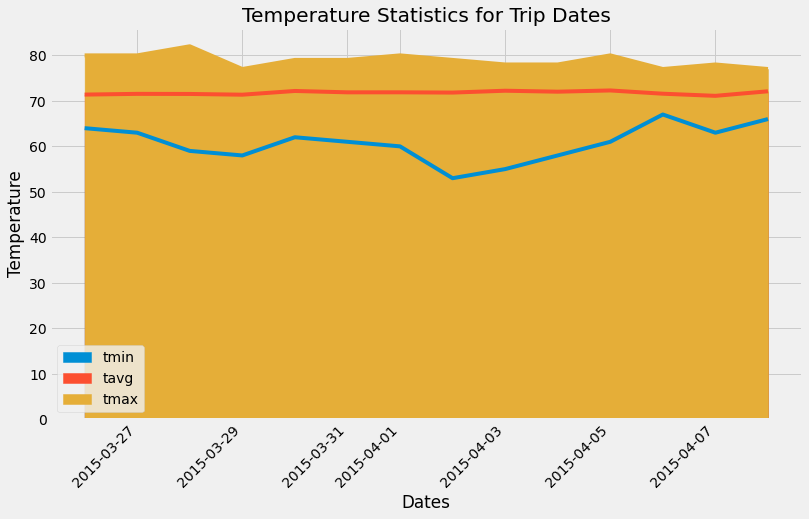

In [169]:
# Plot the daily normals as an area plot with `stacked=False`
date_range_normals_df.plot(kind="area", stacked=False, x_compat=True, alpha=1, figsize=(12,8),\
                          title="Temperature Statistics for Trip Dates")
plt.xticks(rotation=45)
plt.xlabel("Dates")
plt.ylabel("Temperature")
plt.savefig("Images/fig4")
plt.show()